In [34]:
import pandas as pd

df_results = pd.read_csv("results_ACO.csv")
df_results.tail()

df_results["best_route"].max()
# df_results["best_route"] = df_results["best_route"].split()

# df_results["best_route"]

import re

def clean_to_list(text):
    return [float(x) for x in re.findall(r'\d+\.\d+|\d+', str(text))]
    # return [int(x) for x in re.findall(r'\d+', str(text))]

# Zastosowanie do całej kolumny
df_results['best_route'] = df_results['best_route'].apply(clean_to_list)
df_results['worst_route'] = df_results['worst_route'].apply(clean_to_list)
df_results['avg_cost_history'] = df_results['avg_cost_history'].apply(clean_to_list)
df_results['best_cost_history'] = df_results['best_cost_history'].apply(clean_to_list)

### Wykresy zbieżności w zależności od parametrów

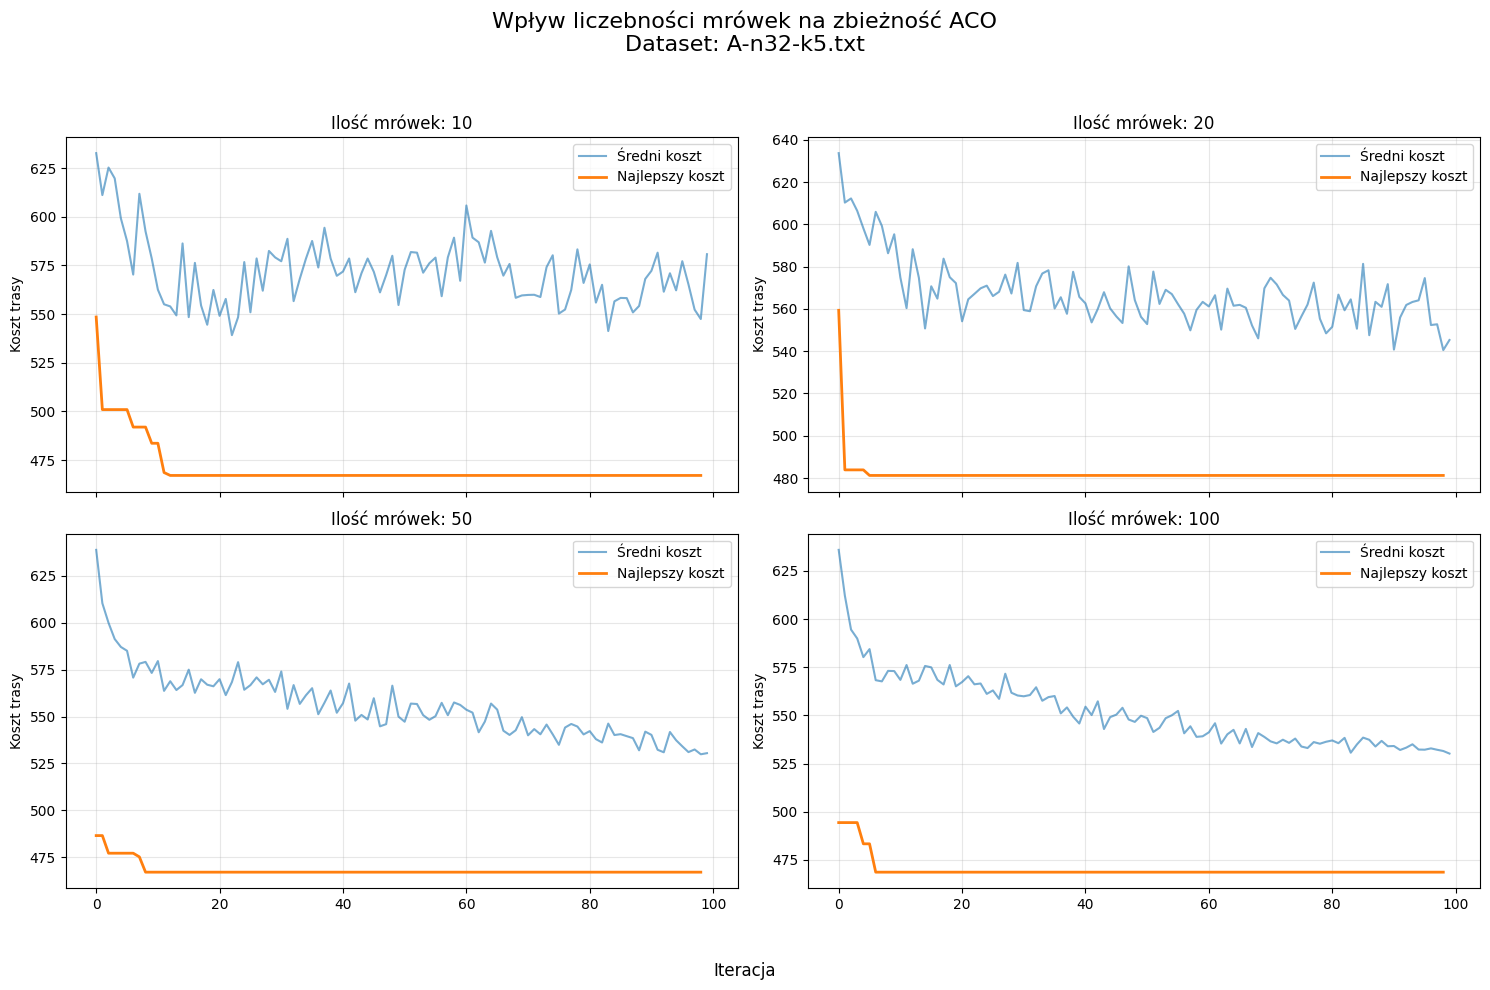

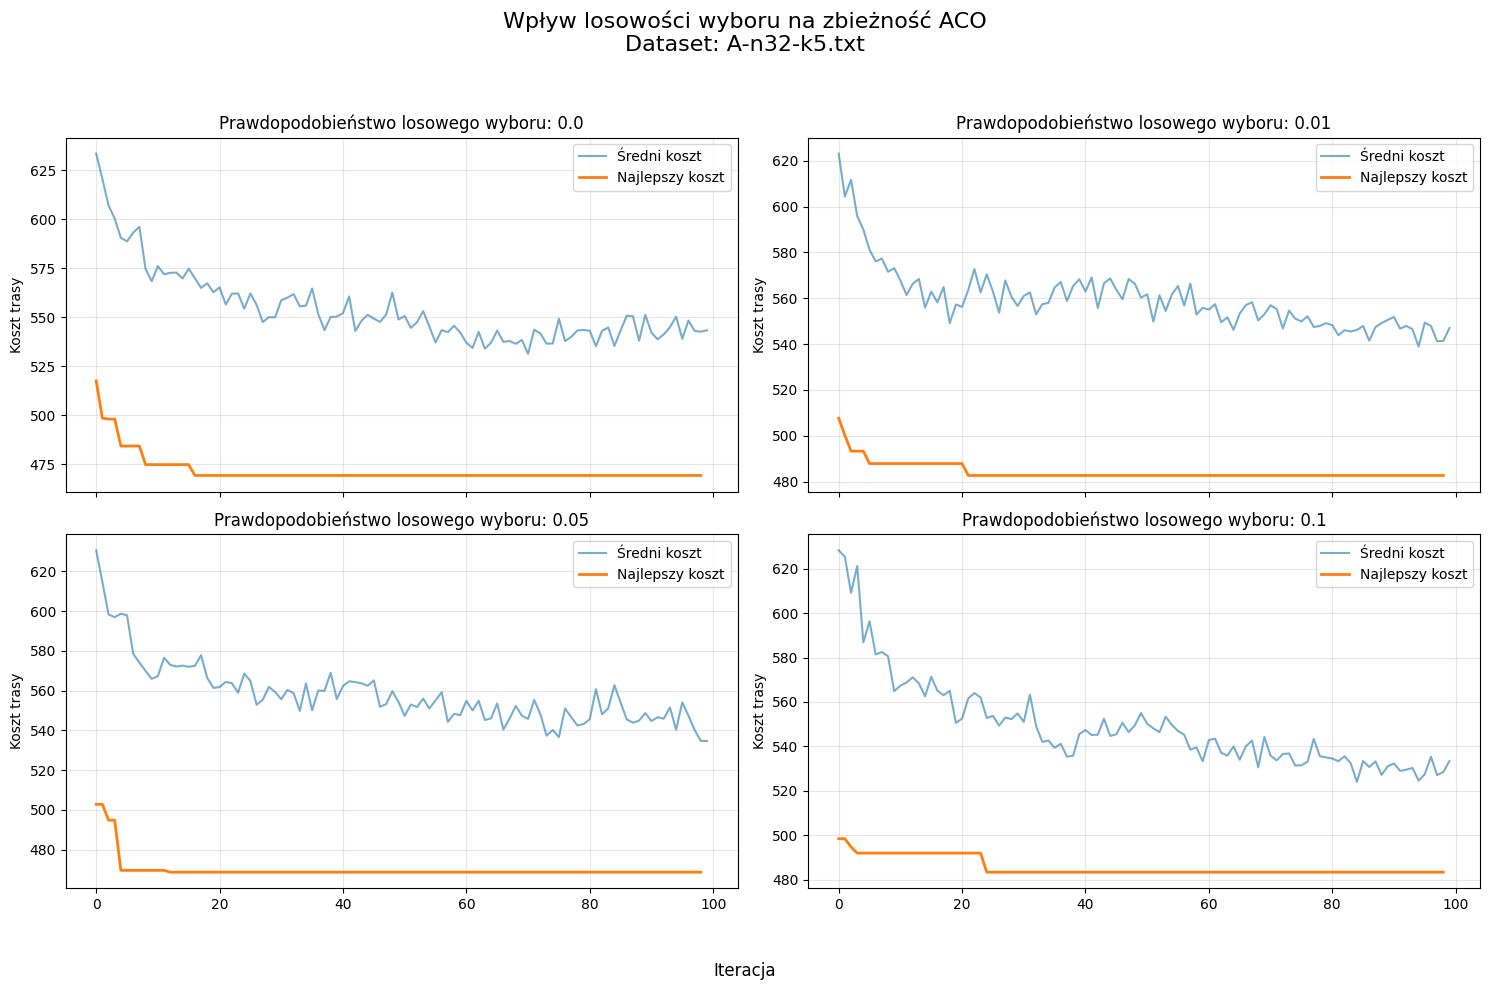

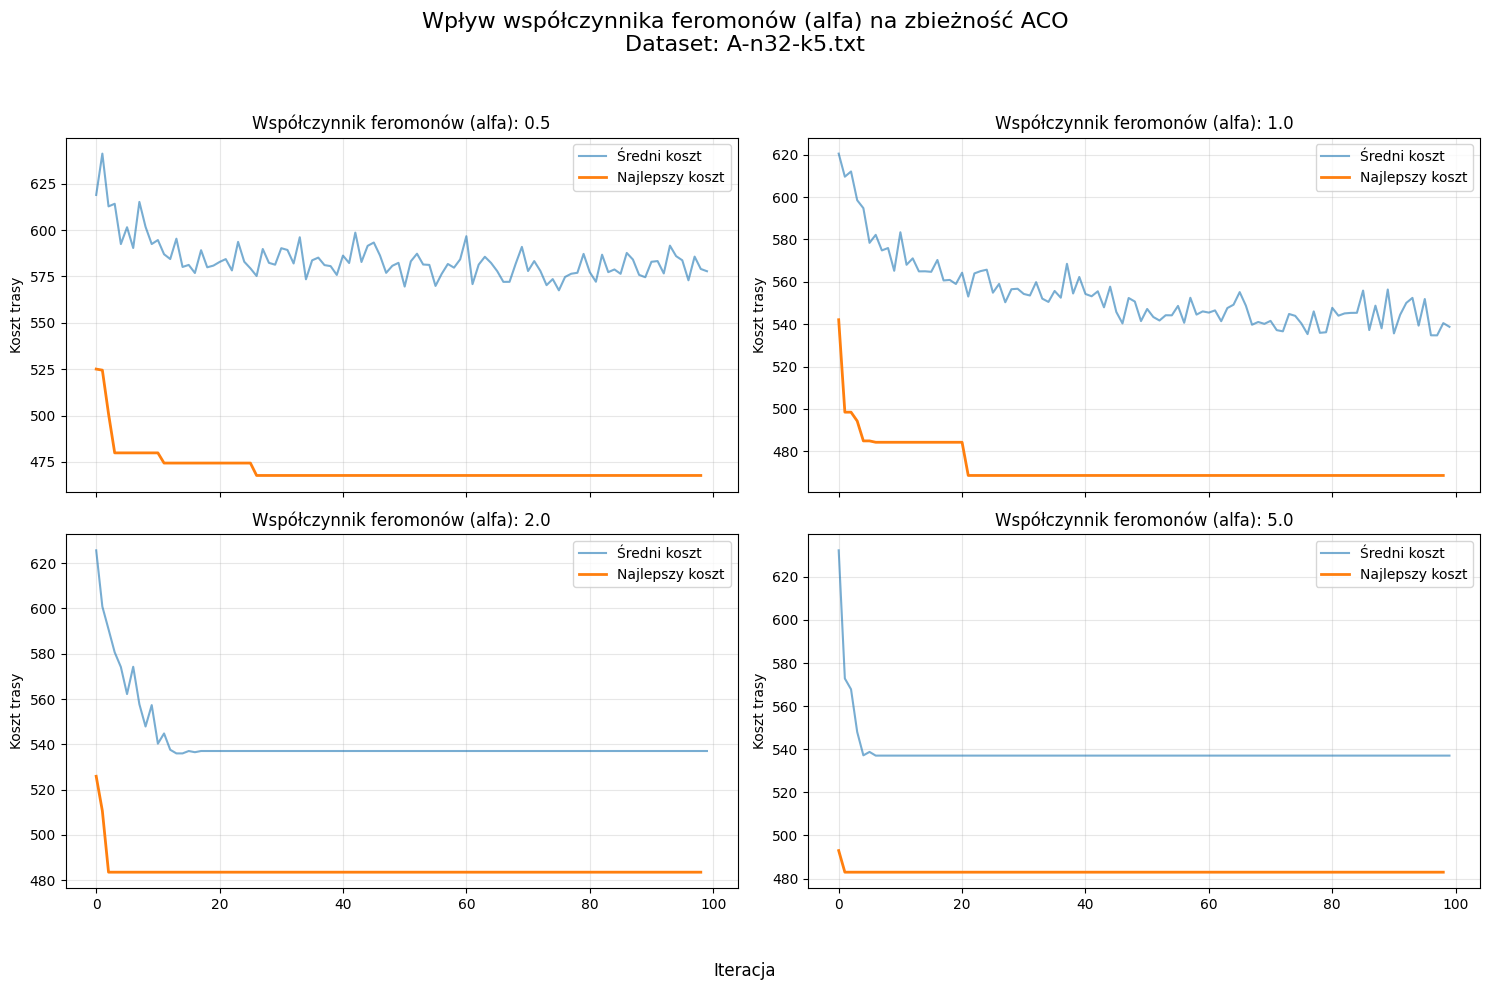

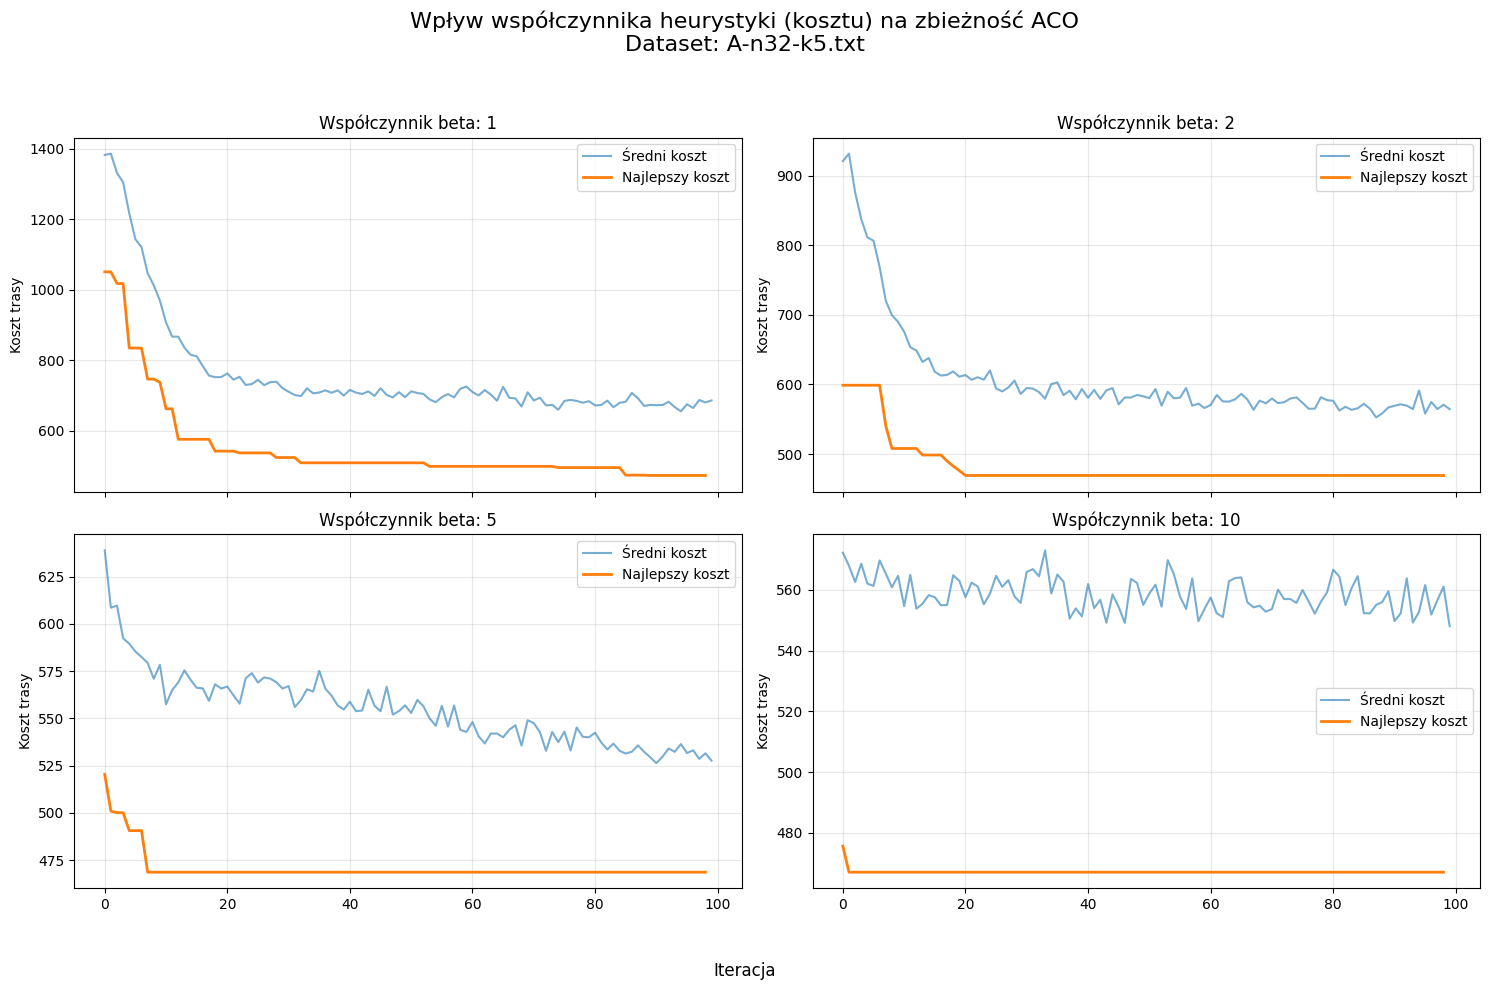

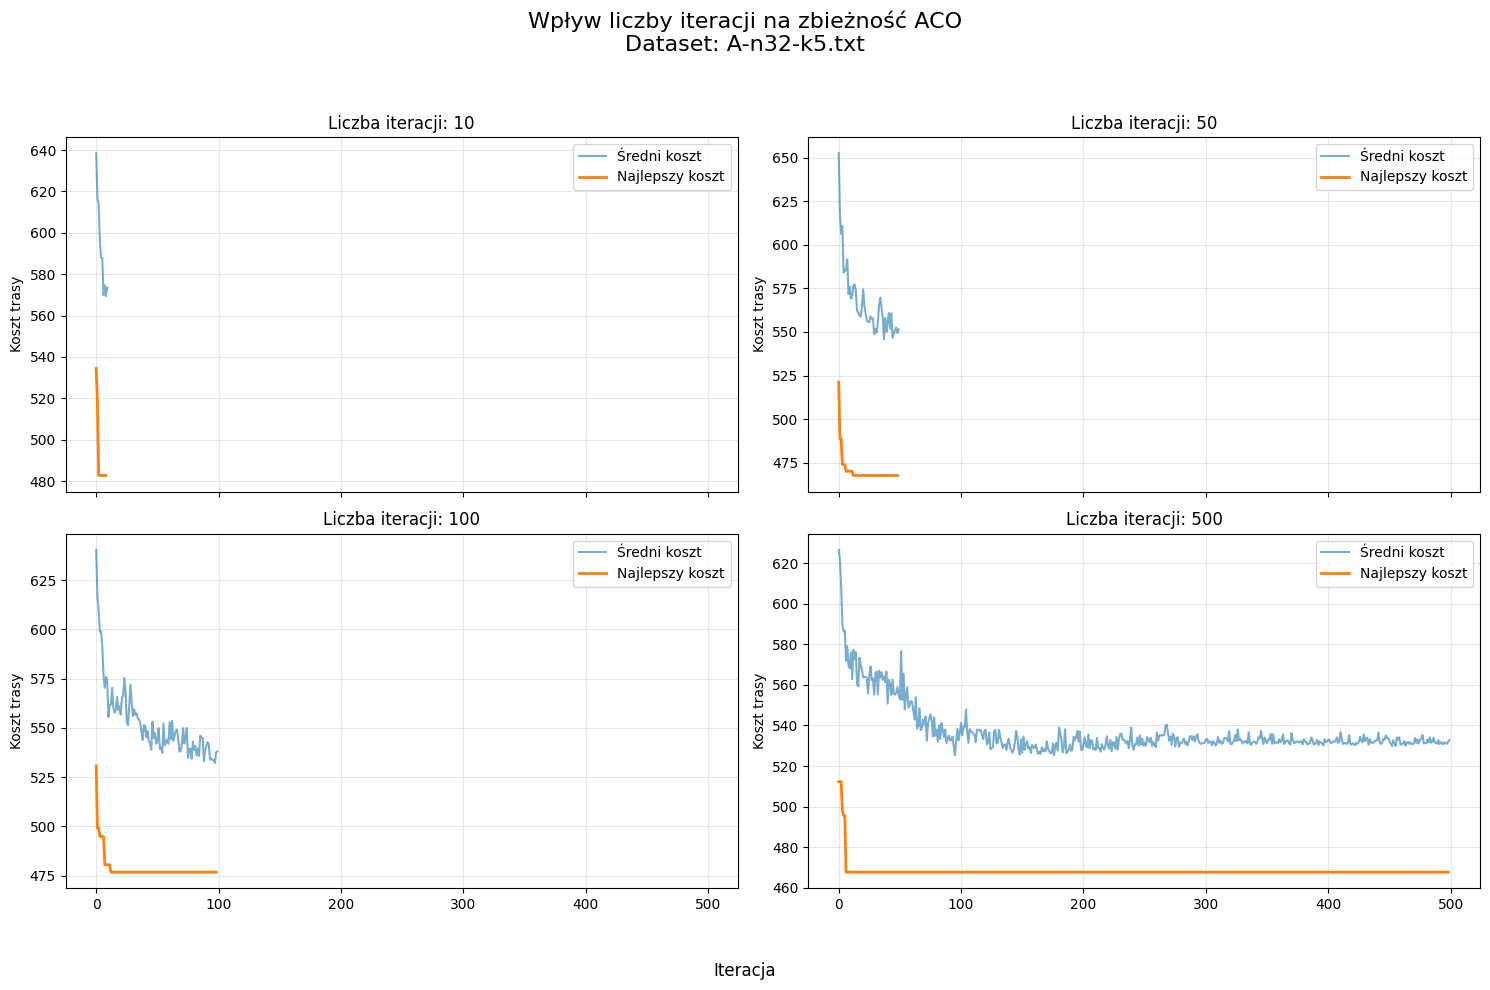

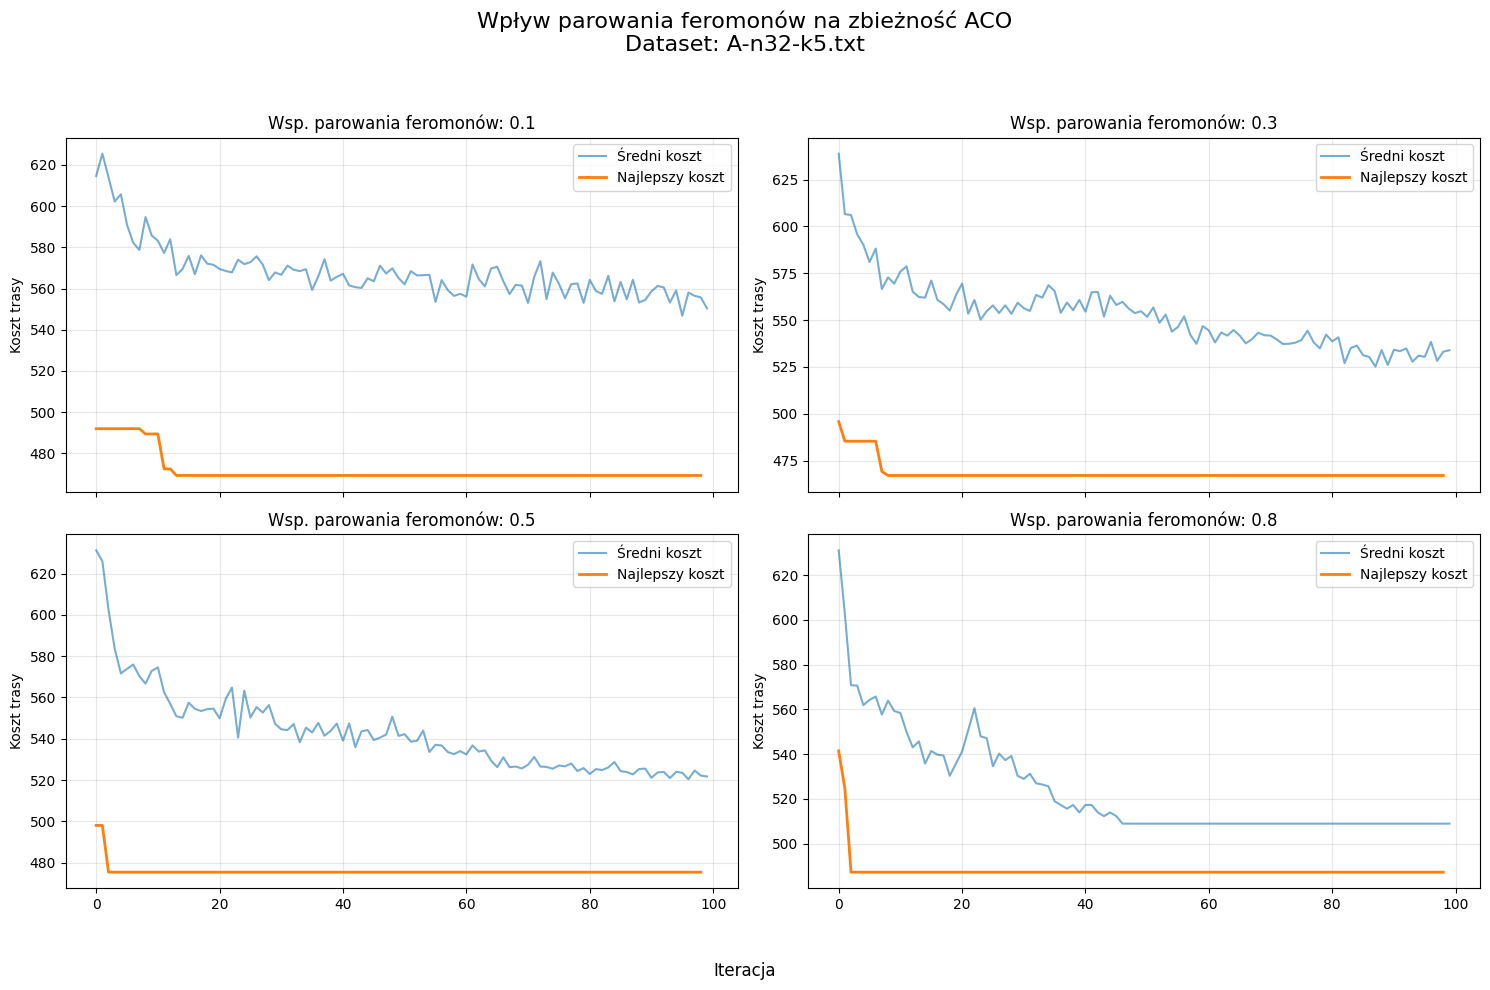

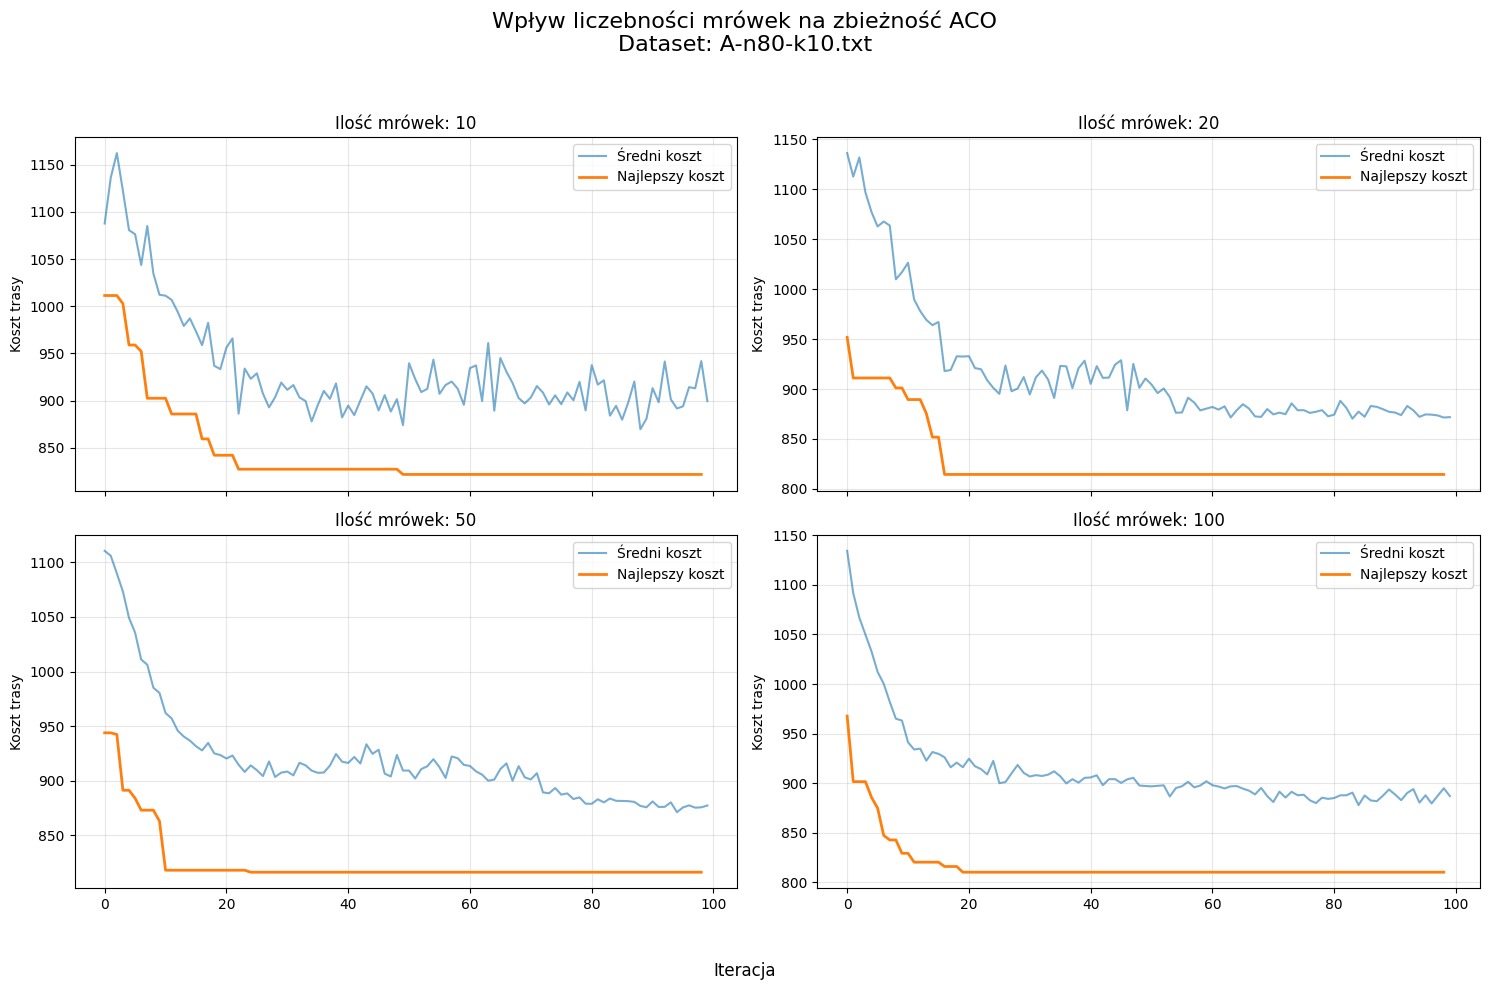

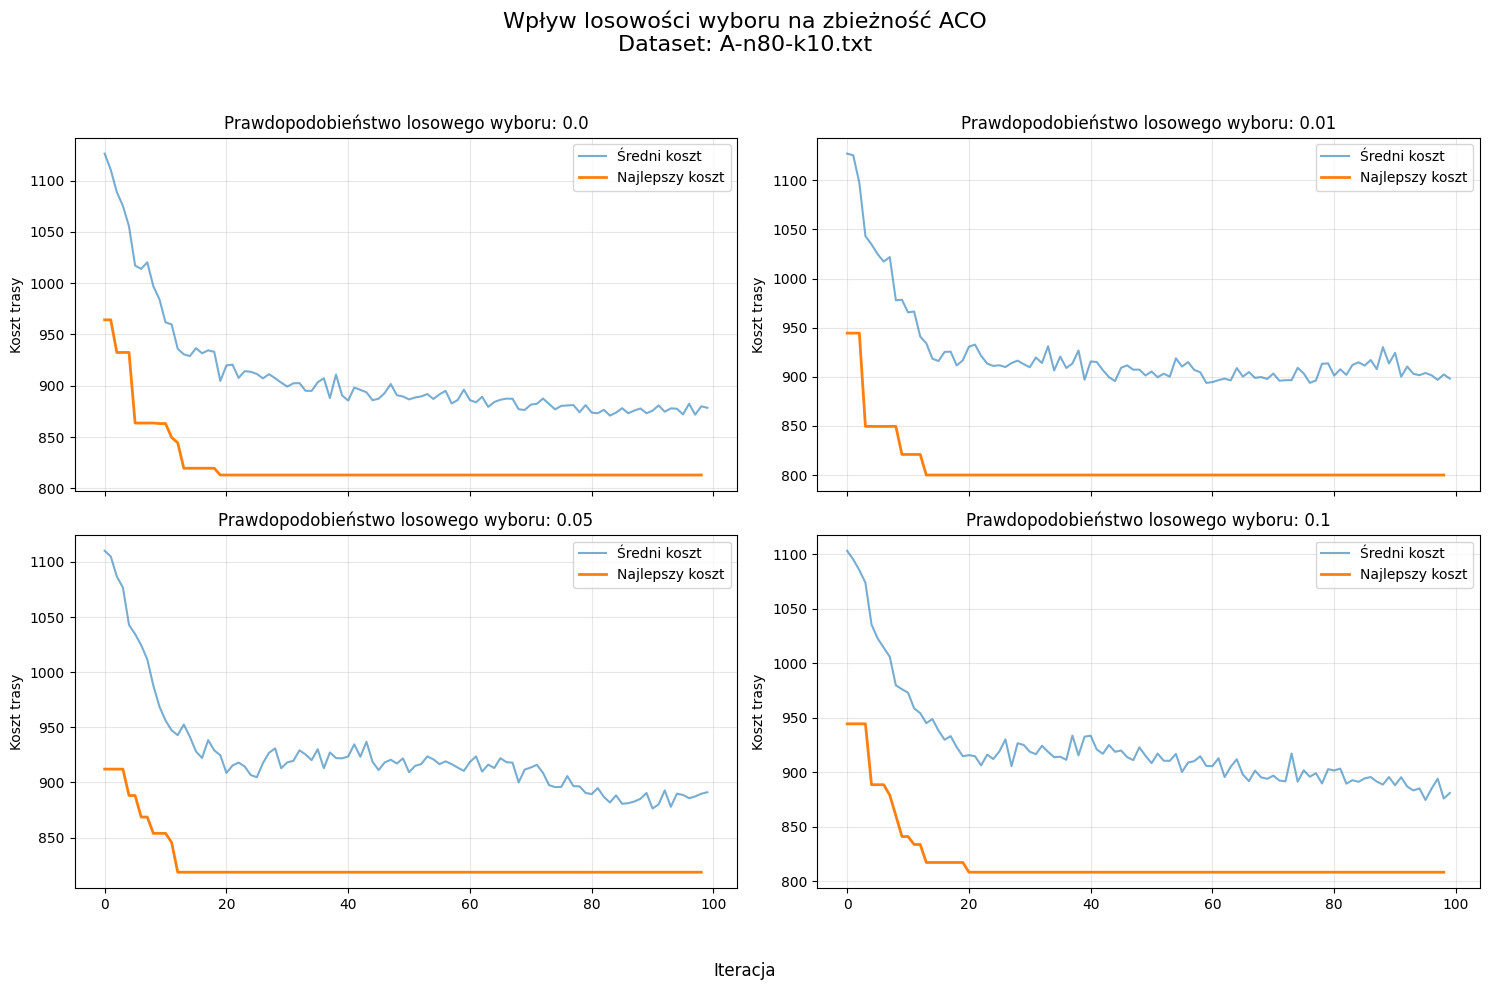

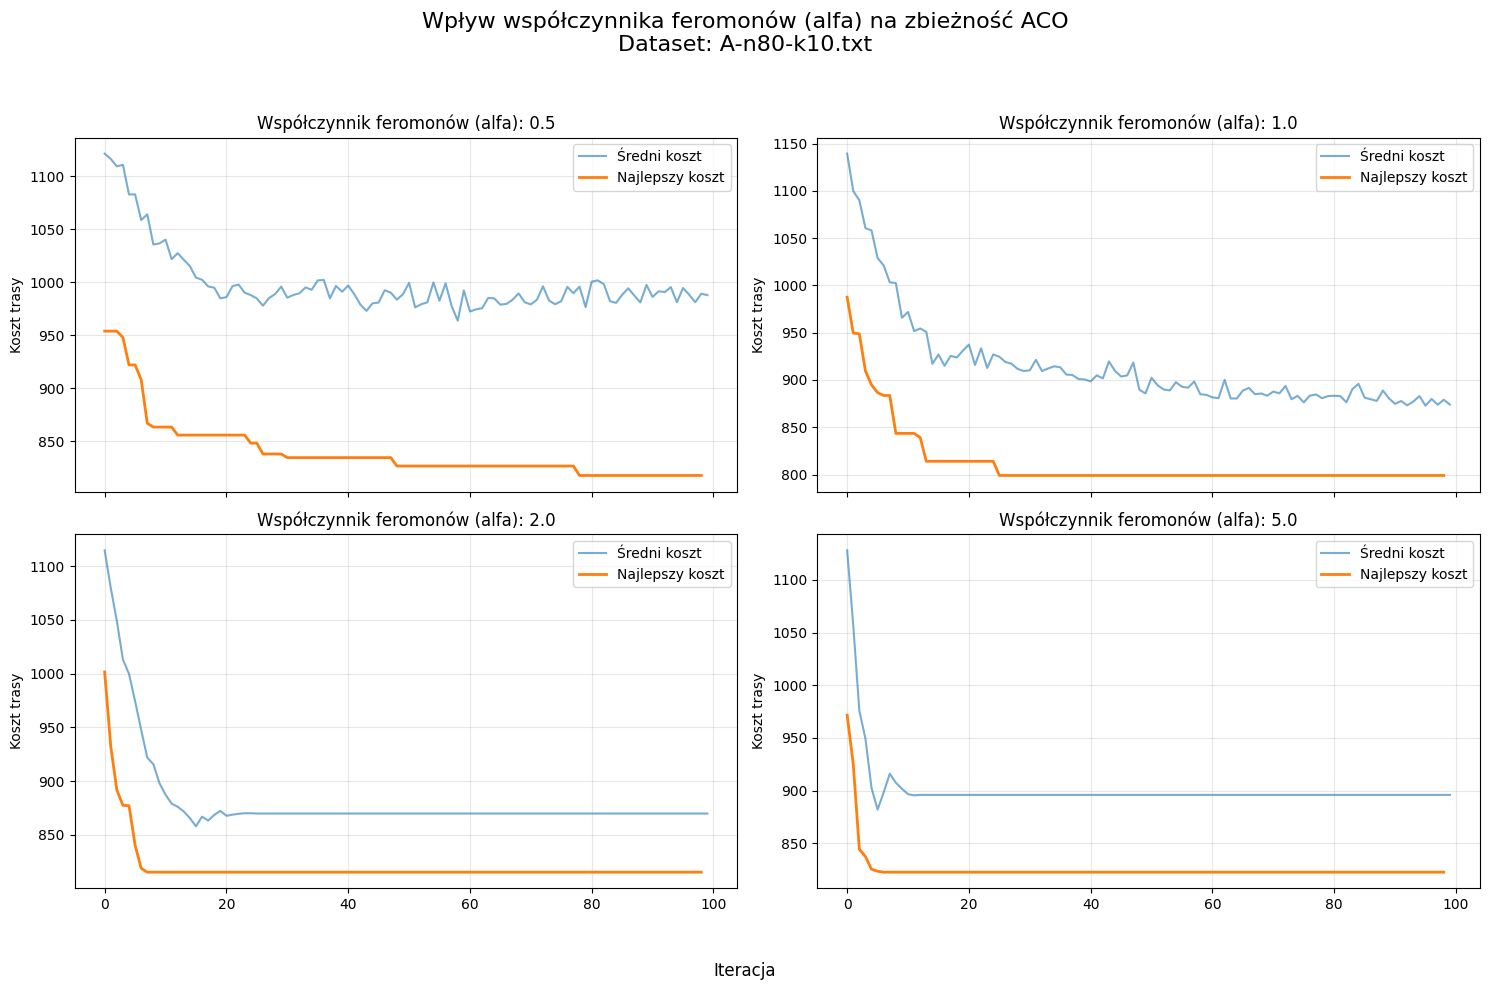

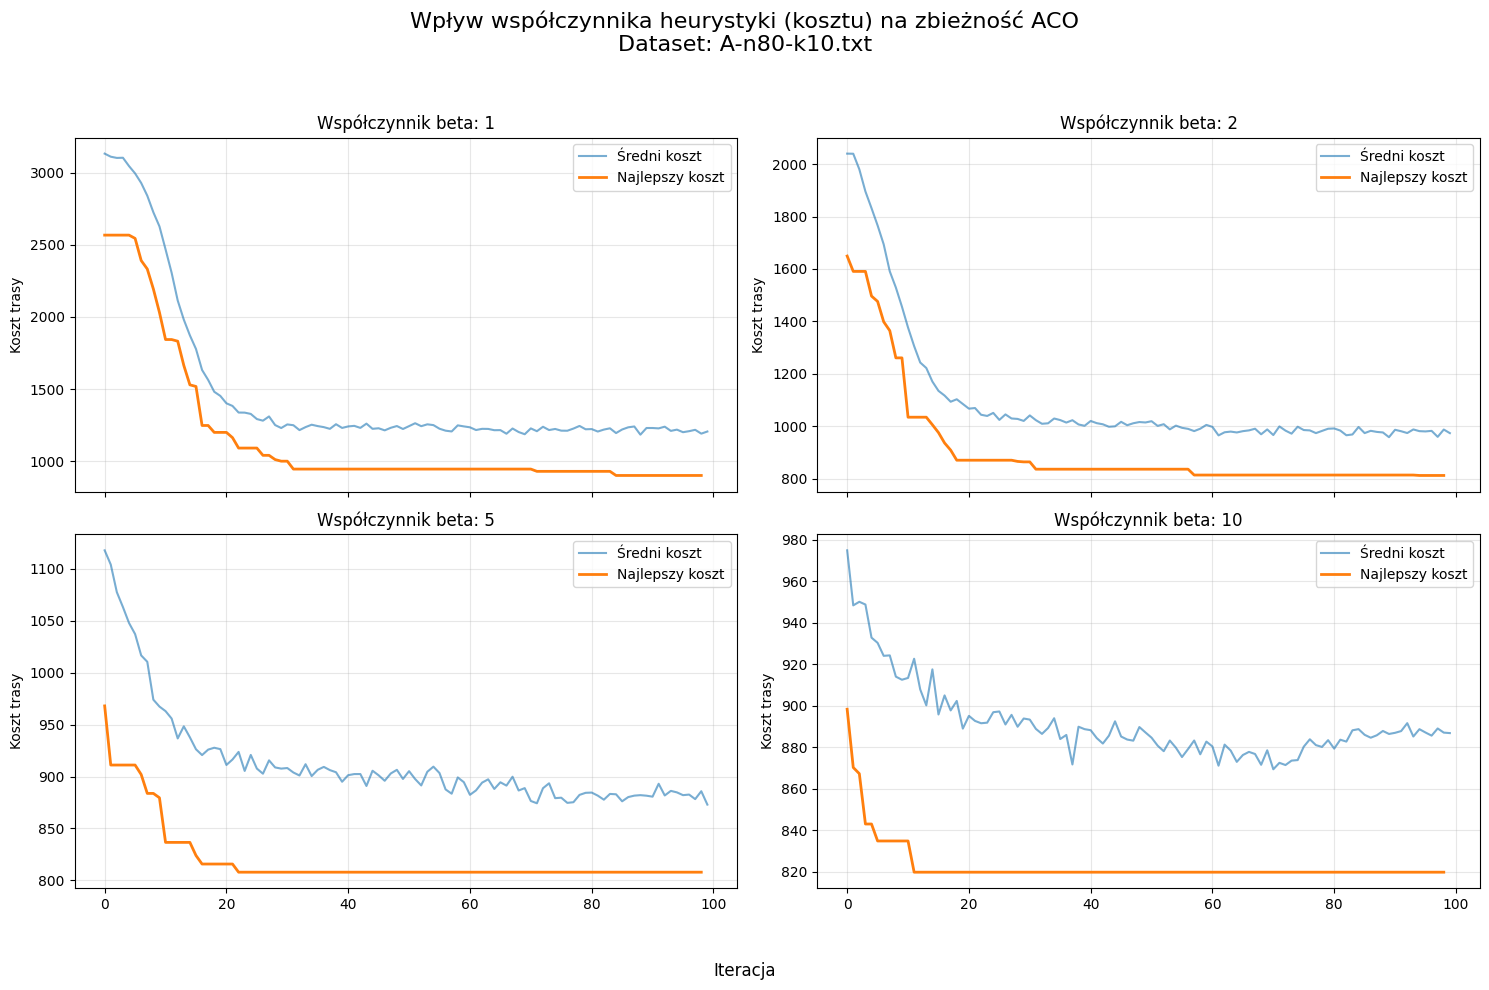

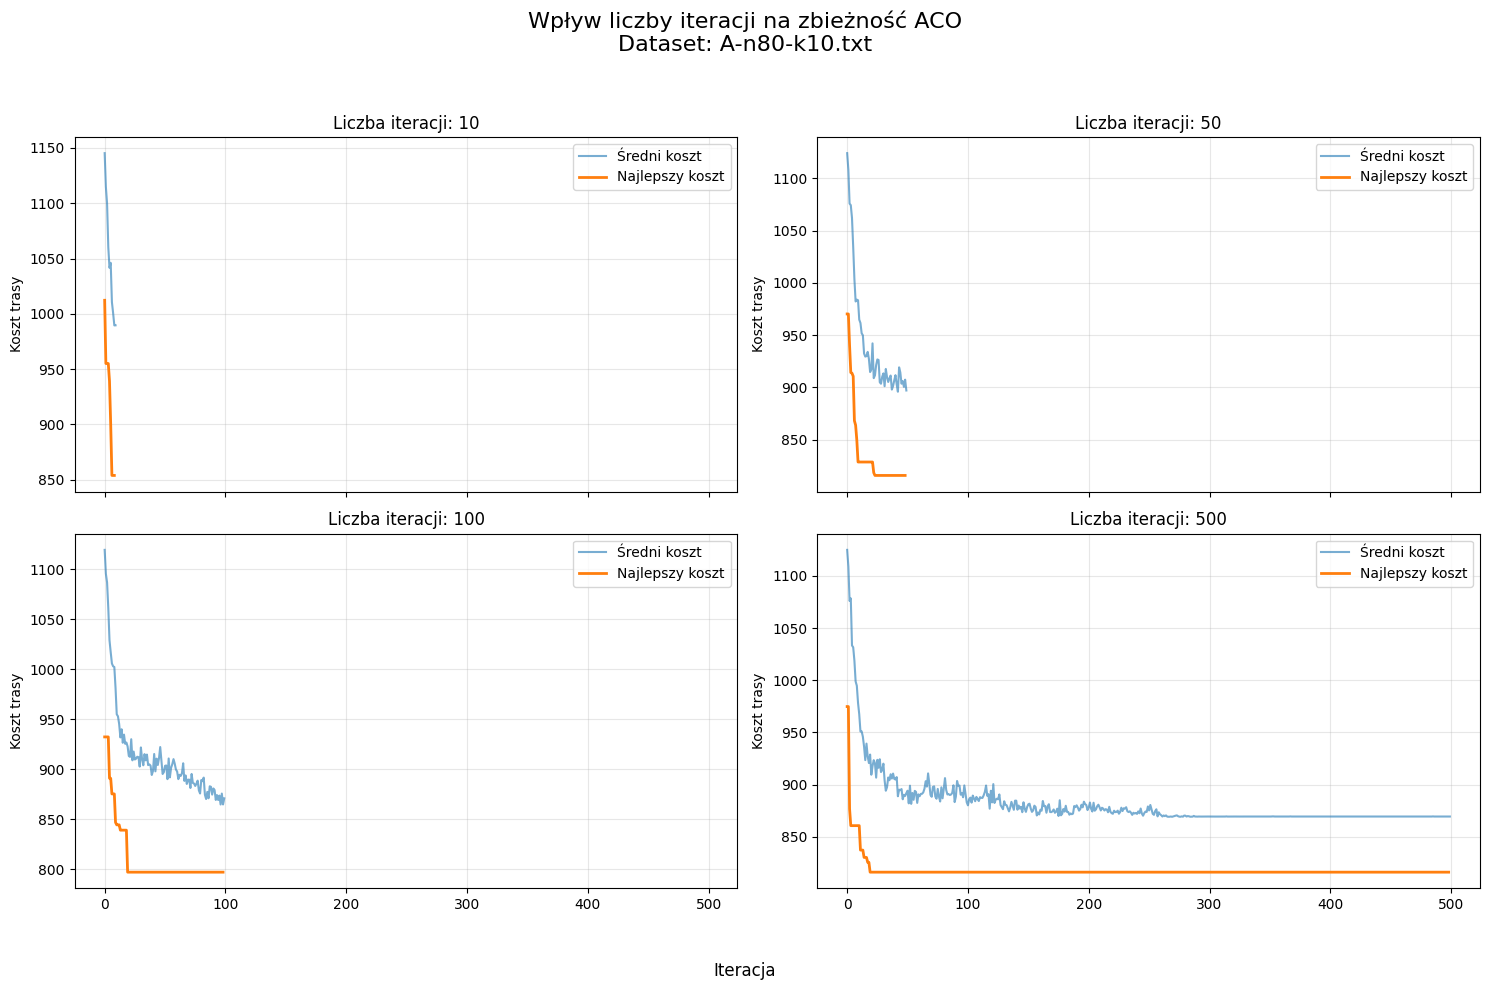

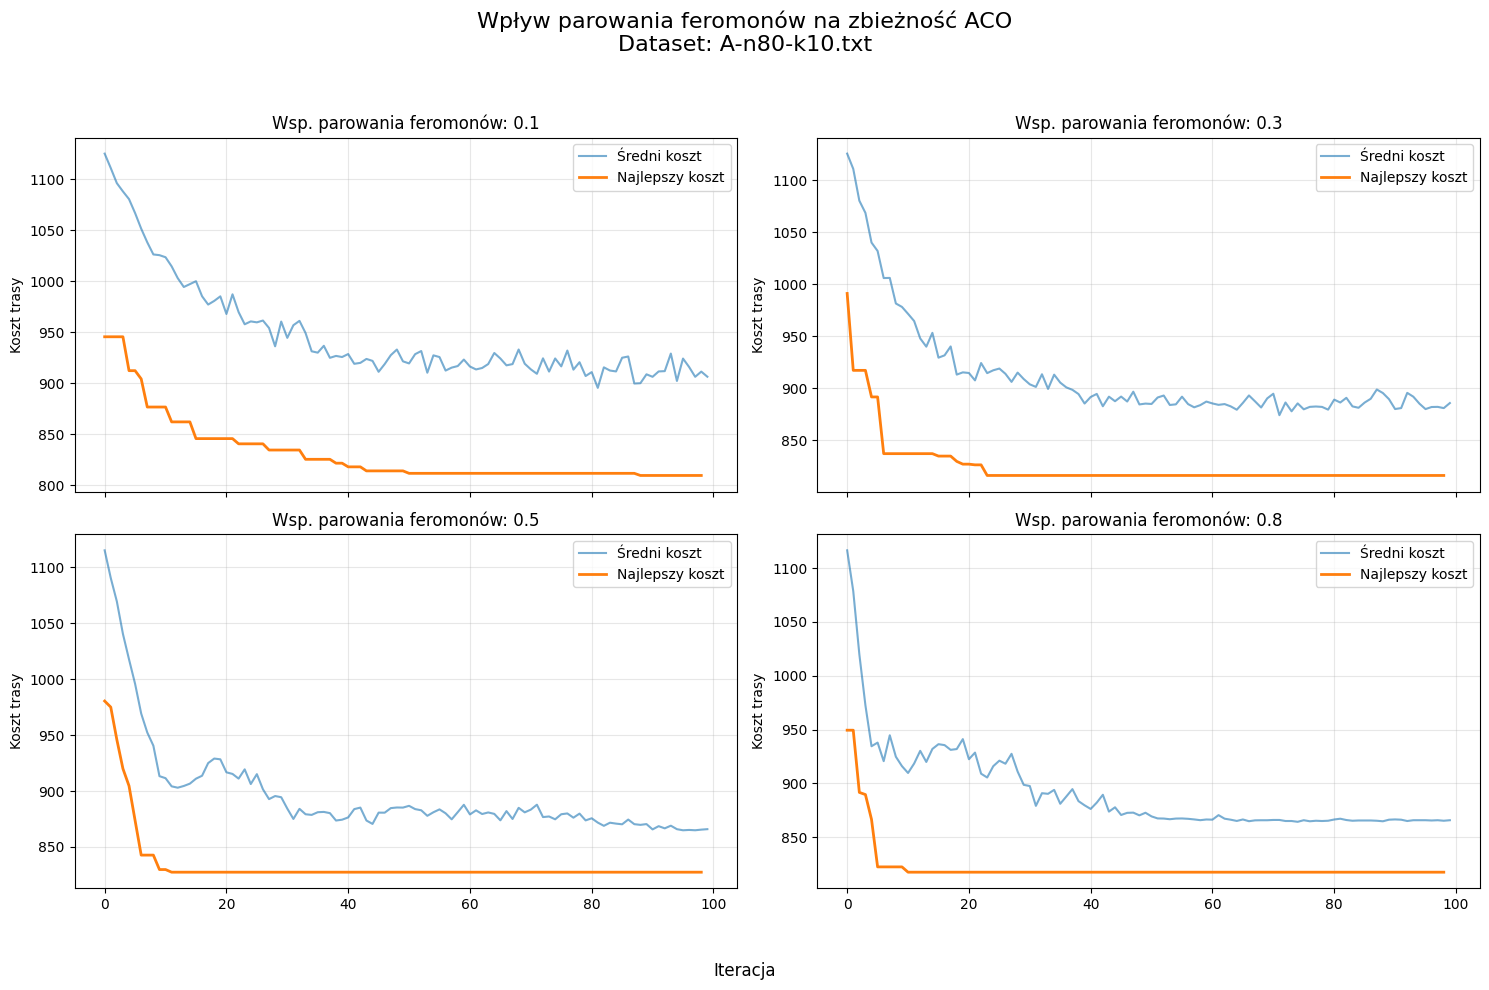

In [64]:
import math
import matplotlib.pyplot as plt

def plot_aco_convergence(
    df,
    dataset,
    exp_no,
    param_col,
    param_label,
    suptitle,
    max_plots=4
):
    df_plot = df[
        (df["dataset"] == dataset) &
        (df["exp_no"] == exp_no)
    ]

    n_plots = min(len(df_plot), max_plots)
    n_rows = math.ceil(n_plots / 2)
    n_cols = 2

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows), sharex=True)
    axes = axes.flatten()

    for i, (_, row) in enumerate(df_plot.iterrows()):
        if i >= max_plots:
            break

        ax = axes[i]

        ax.plot(row["avg_cost_history"], label="Średni koszt", alpha=0.6)
        ax.plot(row["best_cost_history"], label="Najlepszy koszt", linewidth=2)

        ax.set_title(f"{param_label}: {row[param_col]}")
        ax.set_ylabel("Koszt trasy")
        ax.grid(True, alpha=0.3)
        ax.legend()

    fig.suptitle(f"{suptitle}\nDataset: {dataset}", fontsize=16)
    fig.supxlabel("Iteracja")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


plot_configs = [
    {
        "dataset": "A-n32-k5.txt",
        "exp_no": 1,
        "param_col": "m",
        "param_label": "Ilość mrówek",
        "suptitle": "Wpływ liczebności mrówek na zbieżność ACO"
    },
    {
        "dataset": "A-n32-k5.txt",
        "exp_no": 2,
        "param_col": "p_random",
        "param_label": "Prawdopodobieństwo losowego wyboru",
        "suptitle": "Wpływ losowości wyboru na zbieżność ACO"
    },
    {
        "dataset": "A-n32-k5.txt",
        "exp_no": 3,
        "param_col": "alpha",
        "param_label": "Współczynnik feromonów (alfa)",
        "suptitle": "Wpływ współczynnika feromonów (alfa) na zbieżność ACO"
    },
    {
        "dataset": "A-n32-k5.txt",
        "exp_no": 4,
        "param_col": "beta",
        "param_label": "Współczynnik beta",
        "suptitle": "Wpływ współczynnika heurystyki (kosztu) na zbieżność ACO"
    },
    {
        "dataset": "A-n32-k5.txt",
        "exp_no": 5,
        "param_col": "T",
        "param_label": "Liczba iteracji",
        "suptitle": "Wpływ liczby iteracji na zbieżność ACO"
    },
    {
        "dataset": "A-n32-k5.txt",
        "exp_no": 6,
        "param_col": "p",
        "param_label": "Wsp. parowania feromonów",
        "suptitle": "Wpływ parowania feromonów na zbieżność ACO"
    },





    {
        "dataset": "A-n80-k10.txt",
        "exp_no": 1,
        "param_col": "m",
        "param_label": "Ilość mrówek",
        "suptitle": "Wpływ liczebności mrówek na zbieżność ACO"
    },
    {
        "dataset": "A-n80-k10.txt",
        "exp_no": 2,
        "param_col": "p_random",
        "param_label": "Prawdopodobieństwo losowego wyboru",
        "suptitle": "Wpływ losowości wyboru na zbieżność ACO"
    },
    {
        "dataset": "A-n80-k10.txt",
        "exp_no": 3,
        "param_col": "alpha",
        "param_label": "Współczynnik feromonów (alfa)",
        "suptitle": "Wpływ współczynnika feromonów (alfa) na zbieżność ACO"
    },
    {
        "dataset": "A-n80-k10.txt",
        "exp_no": 4,
        "param_col": "beta",
        "param_label": "Współczynnik beta",
        "suptitle": "Wpływ współczynnika heurystyki (kosztu) na zbieżność ACO"
    },
    {
        "dataset": "A-n80-k10.txt",
        "exp_no": 5,
        "param_col": "T",
        "param_label": "Liczba iteracji",
        "suptitle": "Wpływ liczby iteracji na zbieżność ACO"
    },
    {
        "dataset": "A-n80-k10.txt",
        "exp_no": 6,
        "param_col": "p",
        "param_label": "Wsp. parowania feromonów",
        "suptitle": "Wpływ parowania feromonów na zbieżność ACO"
    },
]

for cfg in plot_configs:
    plot_aco_convergence(
        df=df_results,
        dataset=cfg["dataset"],
        exp_no=cfg["exp_no"],
        param_col=cfg["param_col"],
        param_label=cfg["param_label"],
        suptitle=cfg["suptitle"]
    )


### Mapa odwiedzin według najlepszej trasy


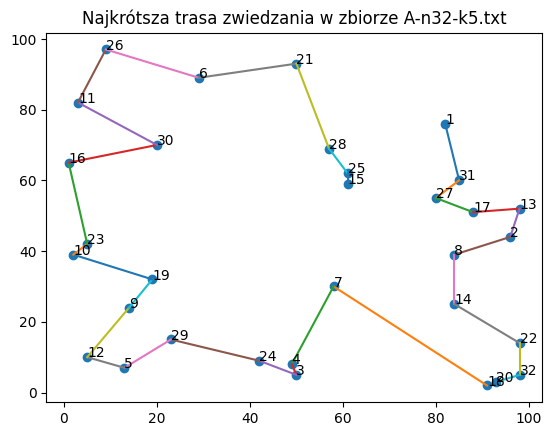

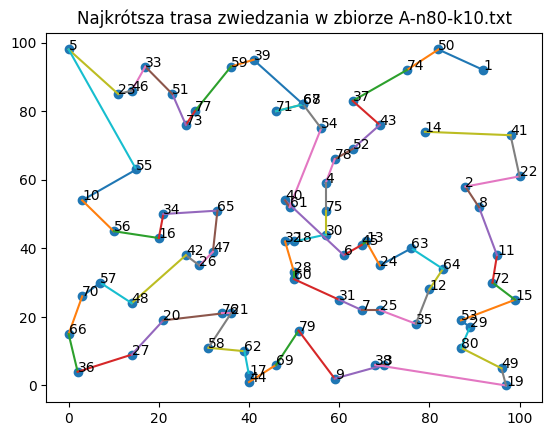

In [63]:
import numpy as np

datasets = ["A-n32-k5.txt", "A-n80-k10.txt"]

for fname in datasets:
        
    df_plot = df_results[(df_results["dataset"] == fname)]

    best_row = df_plot.loc[df_plot['best_cost'].idxmin()]

    best_route = best_row["best_route"]
    # path = best_route.astype(int) - 1
    path = np.array(best_route, dtype=int) - 1


    data = np.loadtxt(fname)
    coords = data[:, 1:3]

    plt.scatter(coords[:,0], coords[:,1])

    for i in range(len(path)-2):
        x = [coords[path[i],0], coords[path[i+1],0]]
        y = [coords[path[i],1], coords[path[i+1],1]]
        plt.plot(x, y)

    for i, (x,y) in enumerate(coords):
        plt.text(x, y, str(i+1))

    plt.title(f'Najkrótsza trasa zwiedzania w zbiorze {fname}')
    plt.savefig(f'Najkrótsza trasa zwiedzania w zbiorze {fname}.png')
    plt.show()


### Wykres średniej z 5 uruchomień oraz obszar pokazujący min–max (lub ± std).

In [ ]:

mean = np.mean(all_best_history, axis=0)
std = np.std(all_best_history, axis=0)
x = np.arange(len(mean))

plt.plot(mean)
plt.fill_between(x, mean-std, mean+std, alpha=0.3)
plt.title("Średnia najlepszych wyników z 5 uruchomień")
plt.savefig("Średnia najlepszych wyników.png")
plt.show()
plt.clf()
